#CKD
Chronic Kidney Disease (CKD) is a progressive condition characterized by a gradual loss of kidney function over time.

#Crucial Role of CKD prediction
**Patient Eligibility Assessment**: CKD prediction helps determine if a patient is a suitable candidate for organ donation, ensuring that only patients with optimal kidney function are considered.

**Risk Stratification:** Understanding a patient's CKD status allows for stratification of risk levels, enabling targeted interventions for those with higher risks of complications.

**Donor-Recipient Matching**: Accurate prediction of CKD stages aids in matching donors and recipients, increasing the chances of successful transplantation outcomes.

**Pre-Transplant Management:** Identifying CKD early allows for proactive management of related conditions (e.g., hypertension, diabetes) that can affect transplant success.

**Patient Education and Counseling:** Predicted CKD stages can inform discussions with patients about their condition, treatment options, and the importance of organ donation.

**Optimizing Post-Transplant Outcomes:** Knowing a patient’s CKD status aids in tailoring post-transplant care plans, ensuring better monitoring and management of potential complications.

**Resource Allocation:** Accurate CKD prediction helps healthcare systems allocate resources efficiently, prioritizing patients who will benefit most from transplantation.

**Long-term Monitoring:** Understanding CKD progression assists in planning for long-term follow-up and care post-transplant, improving overall patient outcomes.

# Importing Libraries

In [ ]:
# For Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

# Import ML Model Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# For Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

naive_bayes(GaussianNB)
LogisticRegression
KNeighborsClassifier
XGBClassifier
DecisionTreeClassifier
AdaBoostClassifier

#Importing Data

In [ ]:

raw_dataset = pd.read_csv('kidney_disease.csv')

# making csv a pandas dataframe
dataframe = pd.DataFrame(raw_dataset)



In [ ]:
dataframe

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Formating datatype

In [ ]:
# setting random seeds
np.random.seed(42)

# dropping 'id' column
dataframe.drop('id', axis = 1, inplace = True)


# rename column names to make it more user-friendly
dataframe.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']


In [ ]:
dataframe.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
dataframe.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
# converting necessary columns to numerical type
dataframe['packed_cell_volume'] = pd.to_numeric(dataframe['packed_cell_volume'], errors='coerce')
dataframe['white_blood_cell_count'] = pd.to_numeric(dataframe['white_blood_cell_count'], errors='coerce')
dataframe['red_blood_cell_count'] = pd.to_numeric(dataframe['red_blood_cell_count'], errors='coerce')


# Extracting categorical and numerical columns
cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object']


In [ ]:
import seaborn as sns

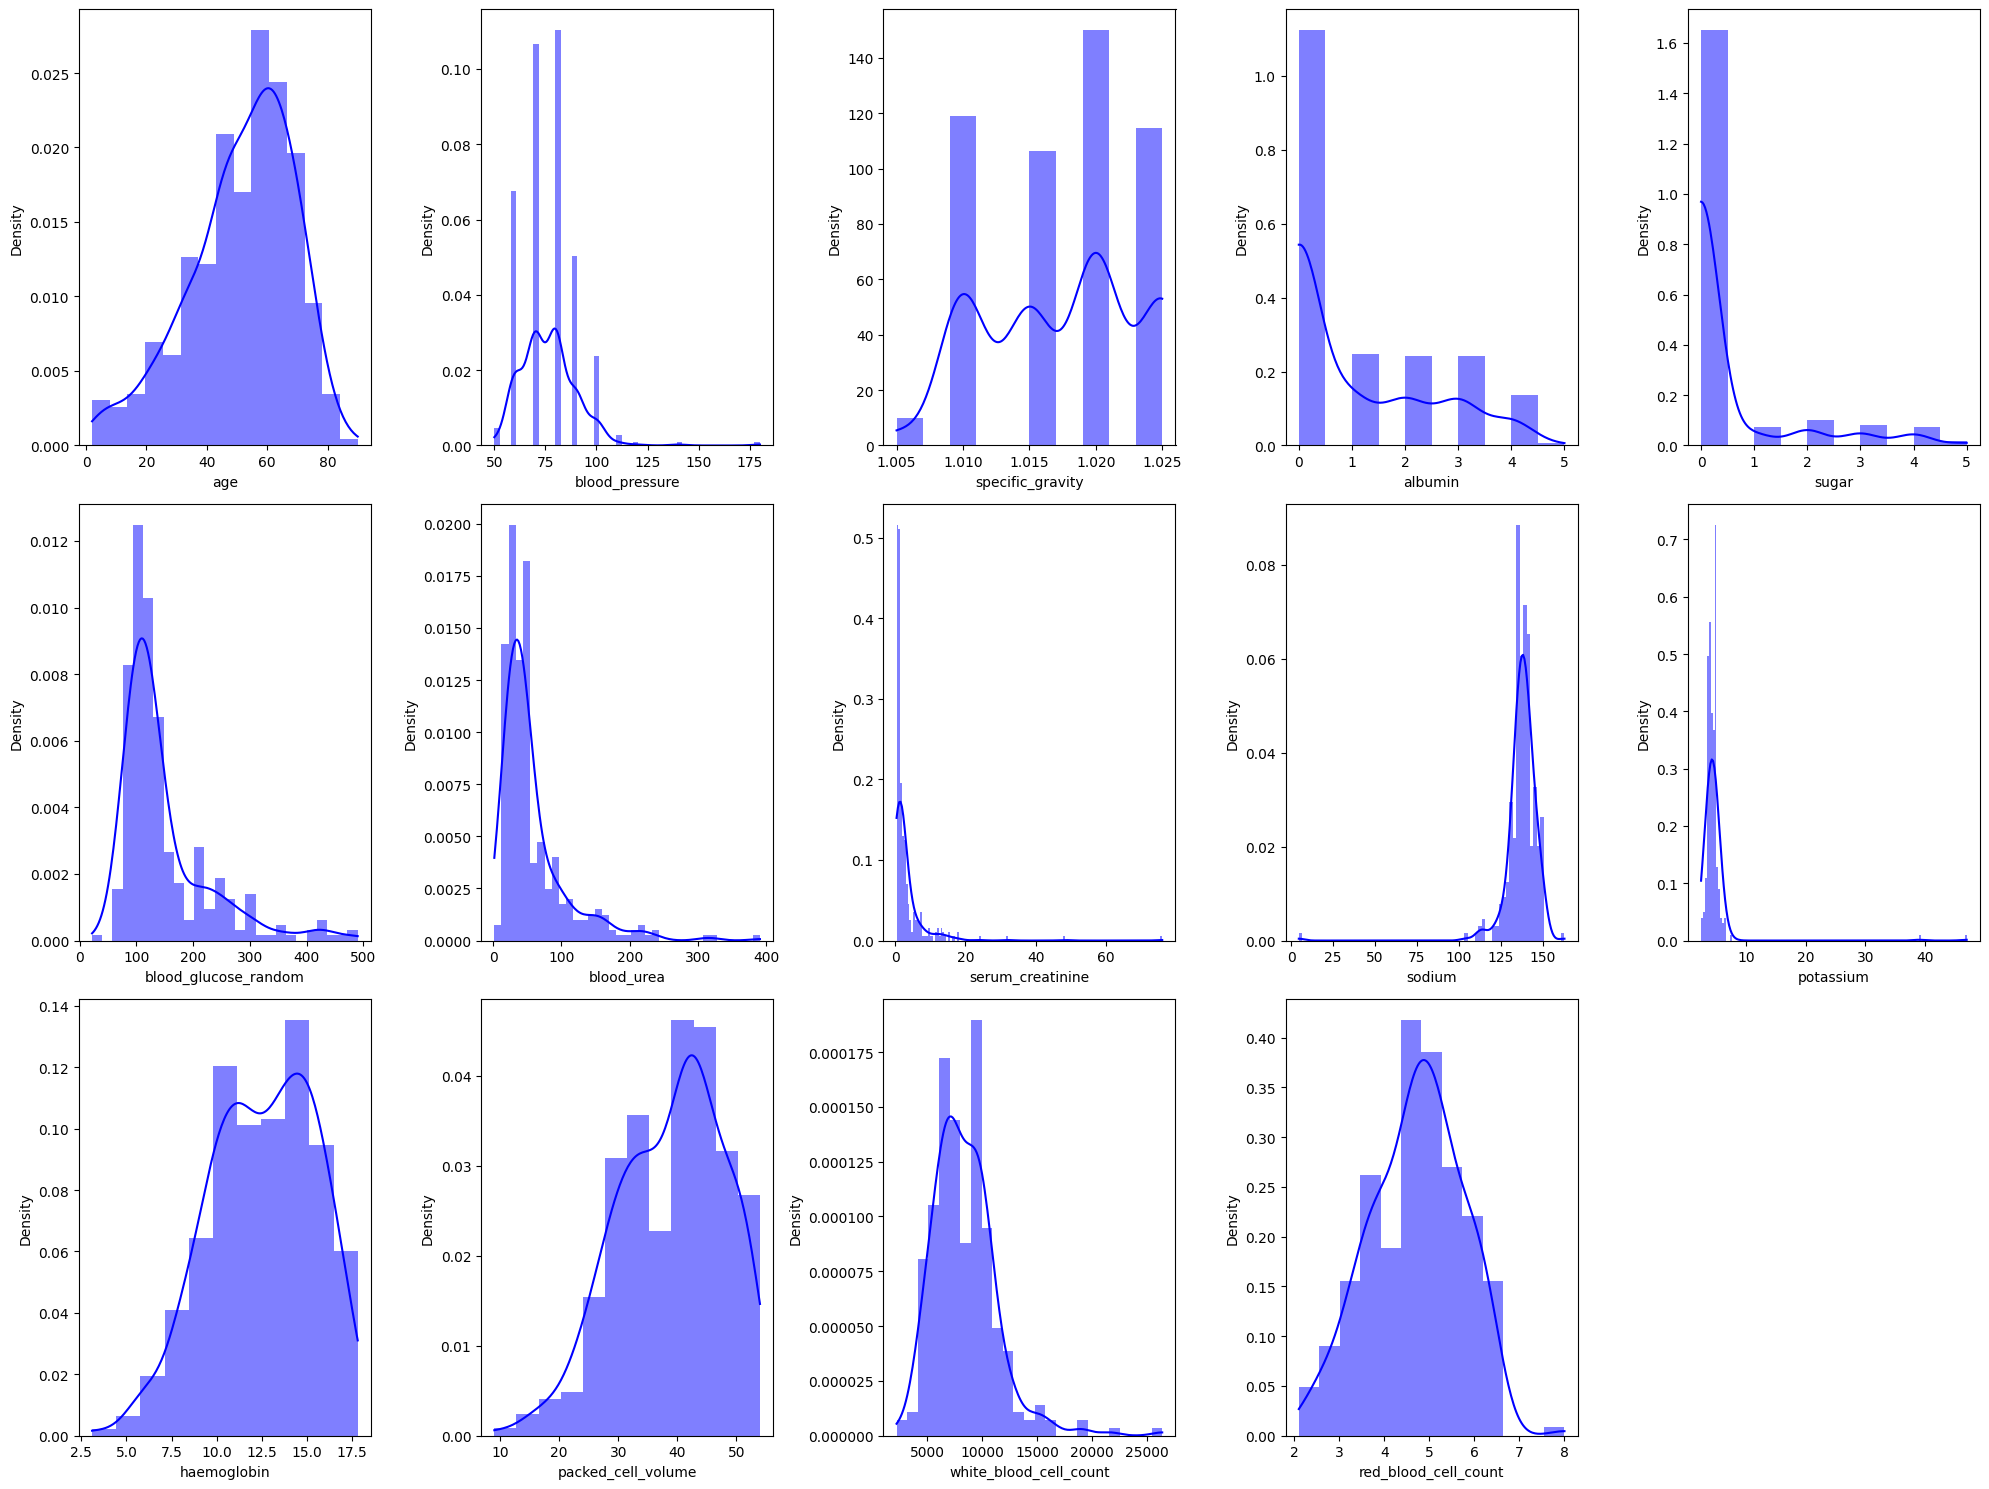

In [ ]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot (dataframe[column],color='blue',kde=True, stat="density", linewidth=0)
        plt.xlabel(column)


    plotnumber += 1

plt.tight_layout()
plt.show()

<ipython-input-8-fc7cd3b70c6b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataframe[column], palette = 'deep',color='black')
<ipython-input-8-fc7cd3b70c6b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataframe[column], palette = 'deep',color='black')
<ipython-input-8-fc7cd3b70c6b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataframe[column], palette = 'deep',color='black')
<ipython-input-8-fc7cd3b70c6b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

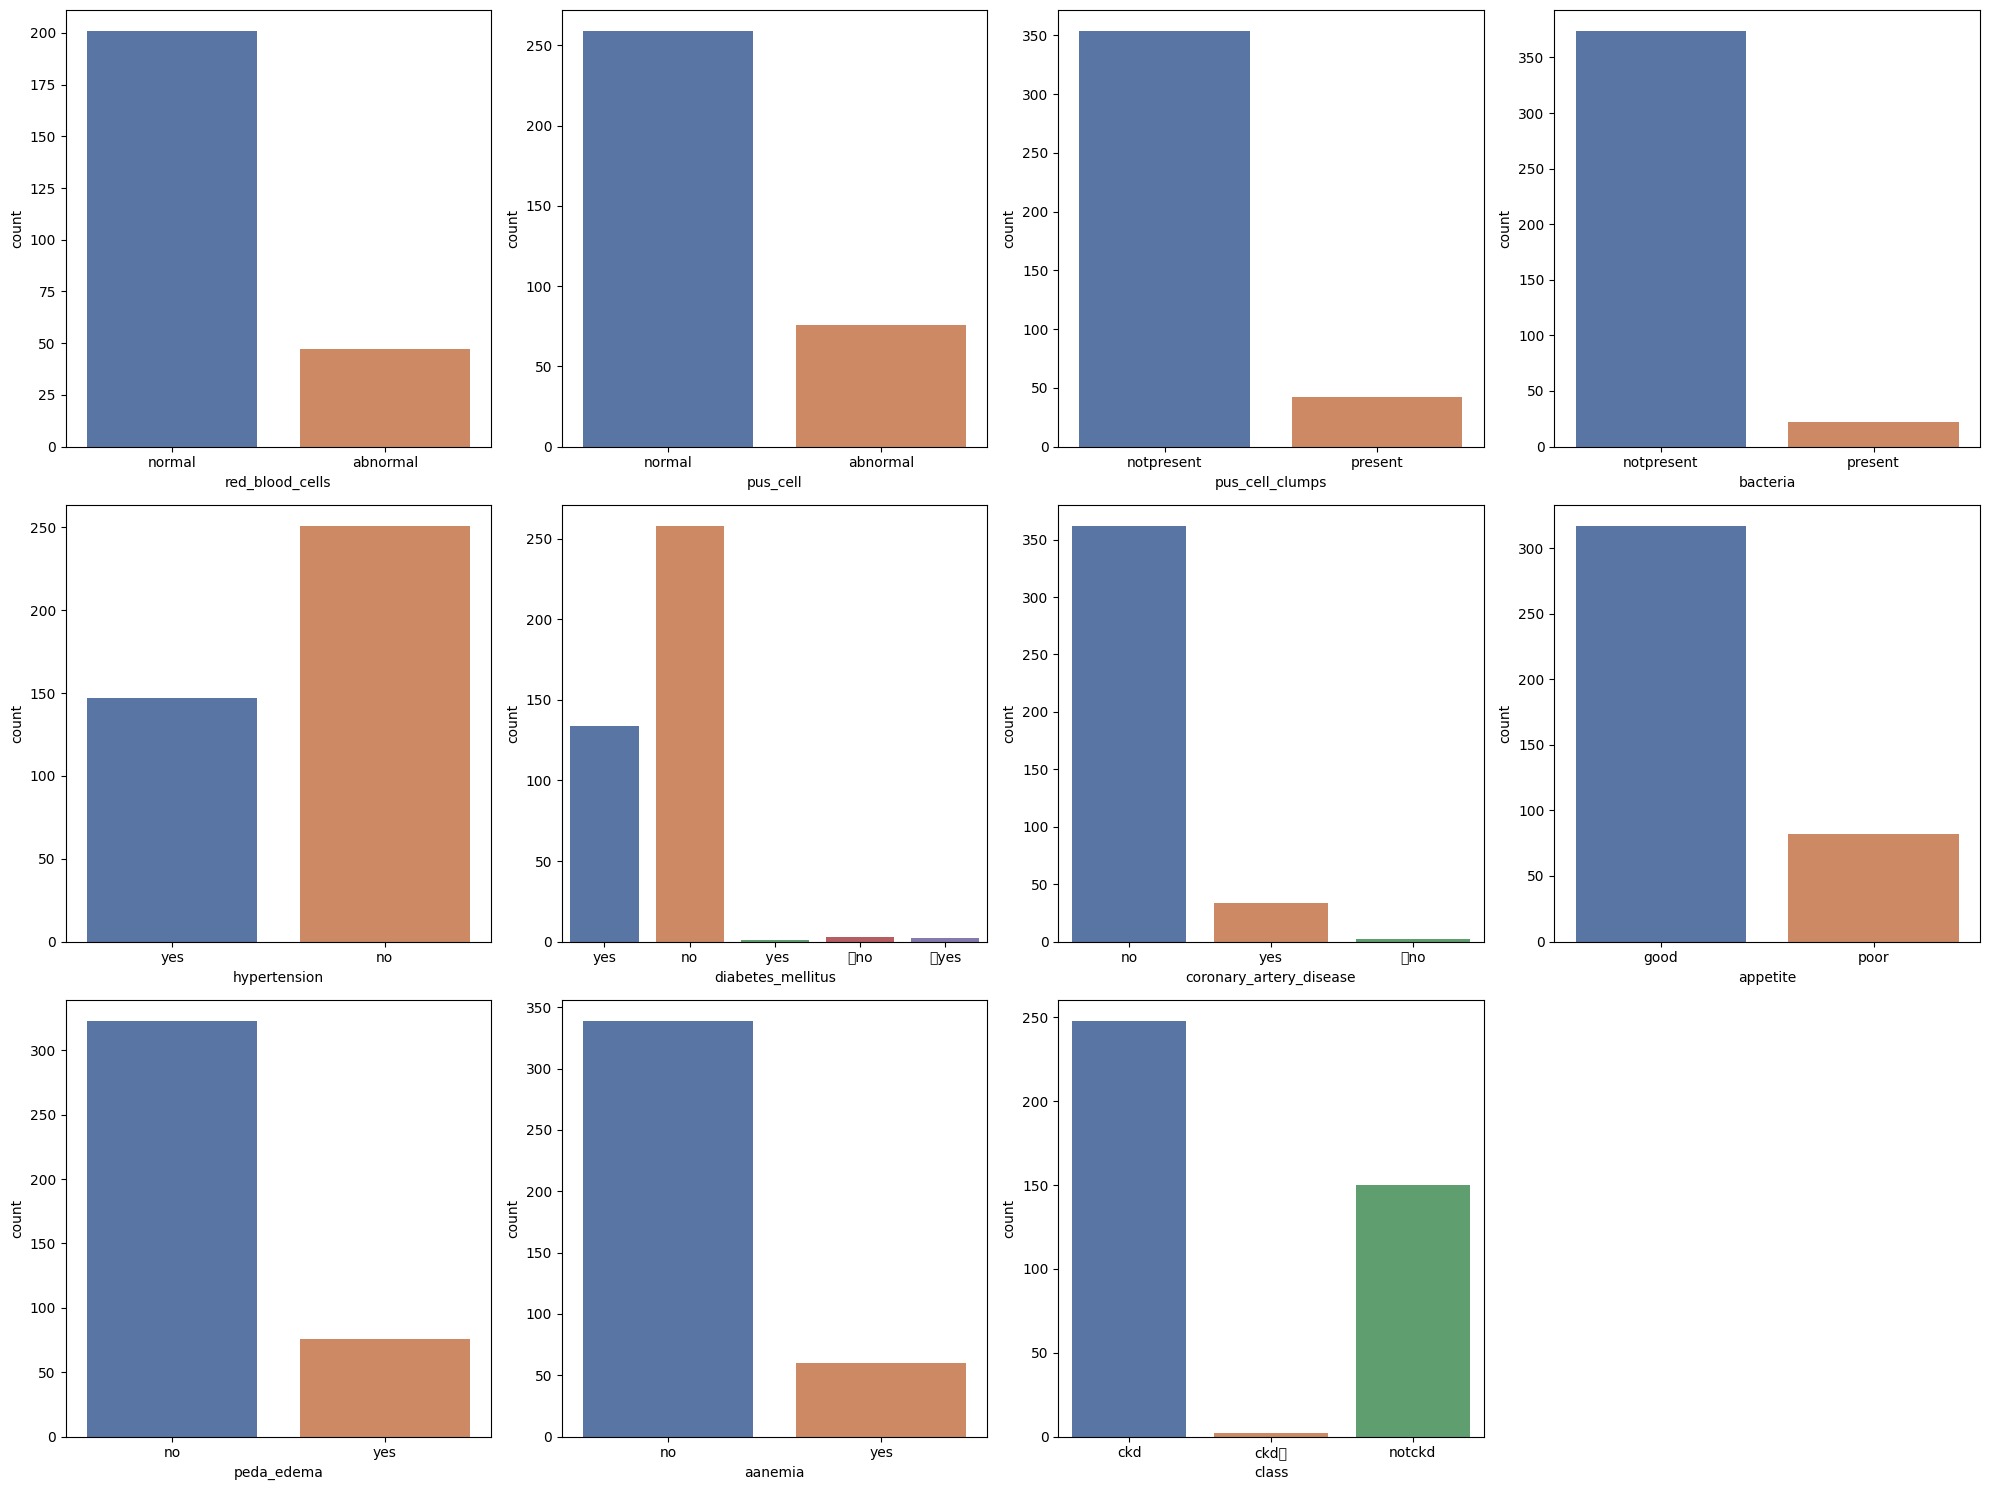

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x = dataframe[column], palette = 'deep',color='black')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# replace incorrect values
dataframe['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
dataframe['coronary_artery_disease'] = dataframe['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
dataframe['class'] = dataframe['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

# replacing 'ckd' with 1 and 'not ckd' with 0
dataframe['class'] = dataframe['class'].map({'ckd': 1, 'not ckd': 0})

# making 'class' column into a numerical column
dataframe['class'] = pd.to_numeric(dataframe['class'], errors='coerce')

<ipython-input-9-99b92ed0dac3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [ ]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = dataframe[feature].dropna().sample(dataframe[feature].isna().sum())
    random_sample.index = dataframe[dataframe[feature].isnull()].index
    dataframe.loc[dataframe[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = dataframe[feature].mode()[0]
    dataframe[feature] = dataframe[feature].fillna(mode)



# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)


# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)


In [ ]:
# Check the distribution of CKD and non-CKD cases
ckd_counts = dataframe['class'].value_counts()

# Display the counts
print("Count of CKD (1):", ckd_counts.get(1, 0))  # Number of CKD cases
print("Count of Non-CKD (0):", ckd_counts.get(0, 0))  # Number of Non-CKD cases

Count of CKD (1): 250
Count of Non-CKD (0): 150


# Feature Encoding

In [ ]:
le = LabelEncoder()

for col in cat_cols:
    dataframe[col] = le.fit_transform(dataframe[col])


dataframe.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,117.0,...,38.0,6000.0,4.3,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


# Splitting  Dataset

In [ ]:
# X = feature matrix
X = dataframe.drop("class", axis=1)     # everything except 'class' column

# Y = lables
Y = dataframe['class']      # only 'class' column

# spliting data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

# Training Models

In [ ]:
# Random Forest
clf_rand_forest = RandomForestClassifier()
clf_rand_forest.fit(X_train, Y_train)

# SVM
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, Y_train)

# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, Y_train)

# Logistic Regression
clf_log = LogisticRegression(solver='lbfgs', max_iter=2500);
clf_log.fit(X_train, Y_train);

# KNN
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, Y_train)

# XG Boost
clf_xgb = XGBClassifier(objective = 'binary:logistic',
                        learning_rate = 0.5,
                        max_depth = 5,
                        n_estimators = 150,
                        eval_metric='mlogloss',
                        use_label_encoder=False)

clf_xgb.fit(X_train, Y_train)

# Decision Tree
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, Y_train)

# Ada Boost
clf_ada = AdaBoostClassifier(estimator = clf_dtc)
clf_ada.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:44:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Models Evaluation

### Random Forest

In [ ]:
Y_pred = clf_rand_forest.predict(X_test)

rand_forest_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:

mean_absolute_error(Y_test,Y_pred)

0.0125

In [ ]:
# Calculate MSE
mse = mean_squared_error(Y_test, Y_pred)

# Calculate RMSE if needed
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.0125
Root Mean Squared Error (RMSE): 0.11180339887498948


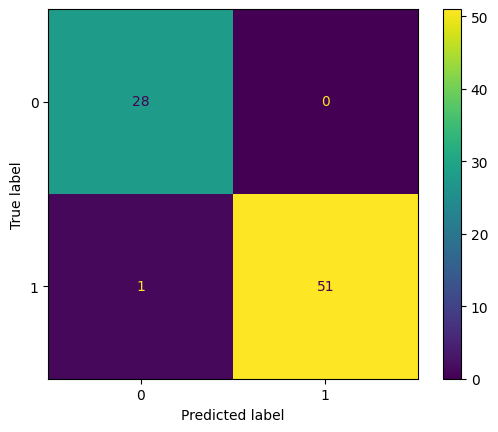

In [ ]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_rand_forest.classes_)
disp.plot()
plt.show()

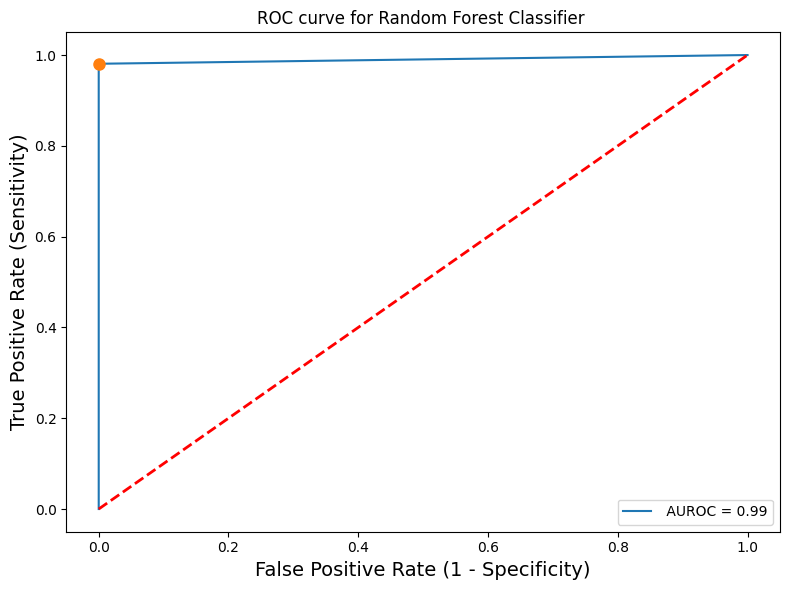

In [ ]:

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Random Forest Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### SVM

In [ ]:
Y_pred = clf_svm.predict(X_test)

svm_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.98      0.96      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:

mean_absolute_error(Y_test,Y_pred)

0.0375

In [ ]:

# Calculate MSE
mse = mean_squared_error(Y_test, Y_pred)

# Calculate RMSE if needed
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0375
Root Mean Squared Error (RMSE): 0.19364916731037085


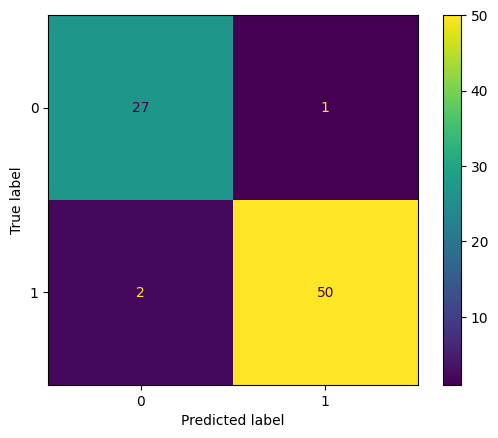

In [ ]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_svm.classes_)
disp.plot()
plt.show()

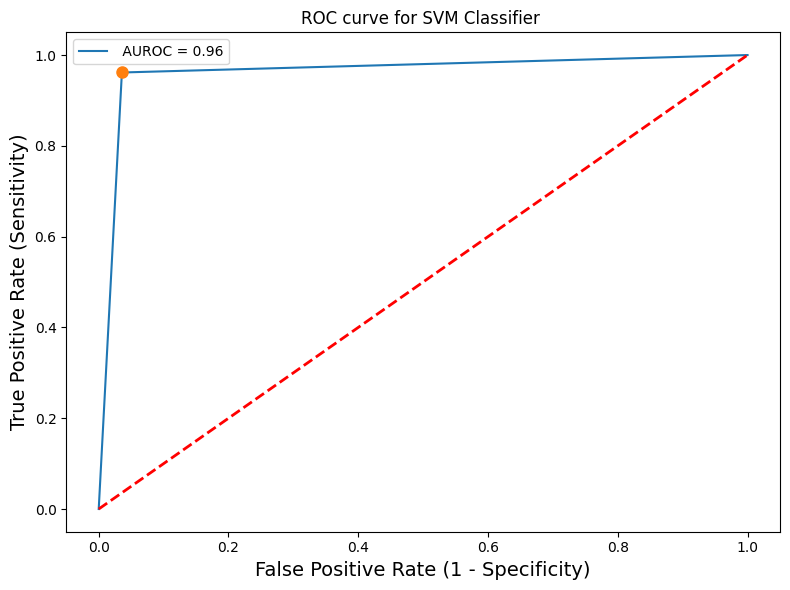

In [ ]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for SVM Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Naive Bayes

In [ ]:
Y_pred = clf_gnb.predict(X_test)

gnb_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [ ]:

mean_absolute_error(Y_test,Y_pred)

0.025

In [ ]:

# Calculate MSE
mse = mean_squared_error(Y_test, Y_pred)

# Calculate RMSE if needed
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.025
Root Mean Squared Error (RMSE): 0.15811388300841897


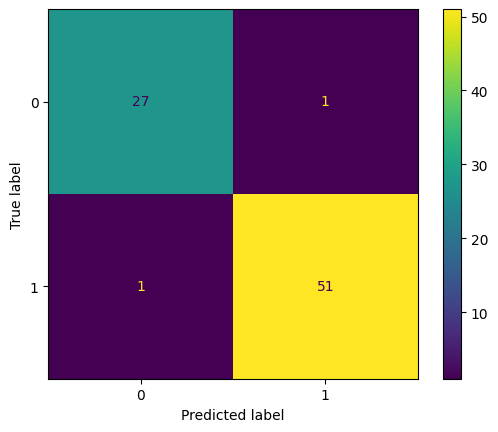

In [ ]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_gnb.classes_)
disp.plot()
plt.show()

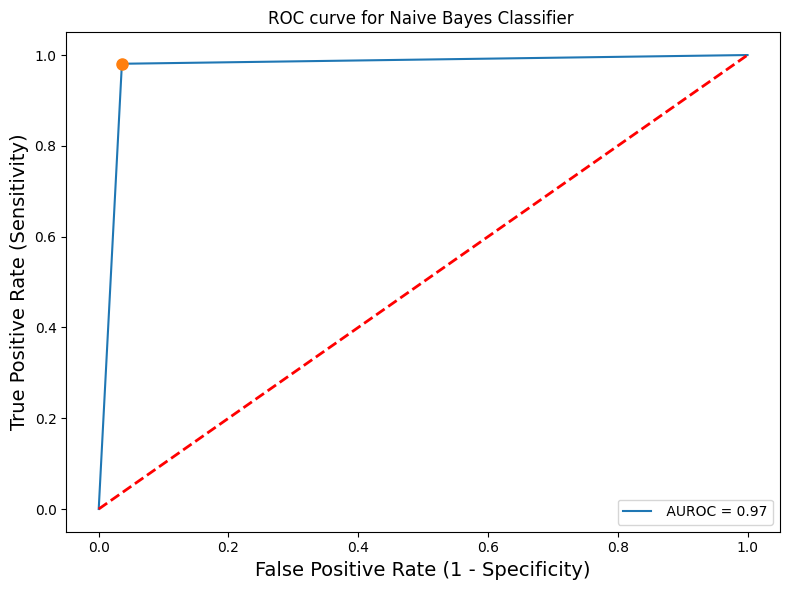

In [ ]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Naive Bayes Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Logistic Regression

In [ ]:
Y_pred = clf_log.predict(X_test)

log_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:

mean_absolute_error(Y_test,Y_pred)

0.0125

In [ ]:

# Calculate MSE
mse = mean_squared_error(Y_test, Y_pred)

# Calculate RMSE if needed
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0125
Root Mean Squared Error (RMSE): 0.11180339887498948


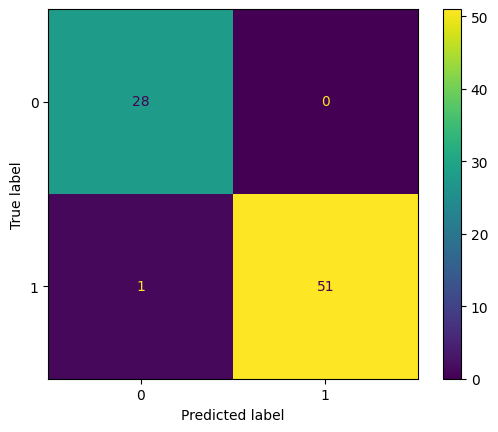

In [ ]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_log.classes_)
disp.plot()
plt.show()

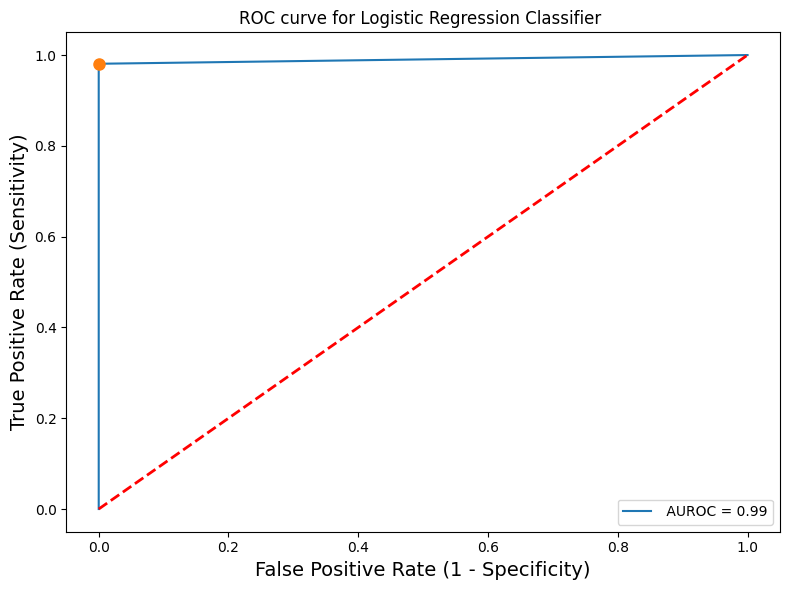

In [ ]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Logistic Regression Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### KNN

In [ ]:
Y_pred = clf_knn.predict(X_test)

knn_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.89      0.69        28
           1       0.92      0.63      0.75        52

    accuracy                           0.72        80
   macro avg       0.74      0.76      0.72        80
weighted avg       0.79      0.72      0.73        80



In [ ]:

mean_absolute_error(Y_test,Y_pred)

0.275

In [ ]:

# Calculate MSE
mse = mean_squared_error(Y_test, Y_pred)

# Calculate RMSE if needed
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.275
Root Mean Squared Error (RMSE): 0.5244044240850758


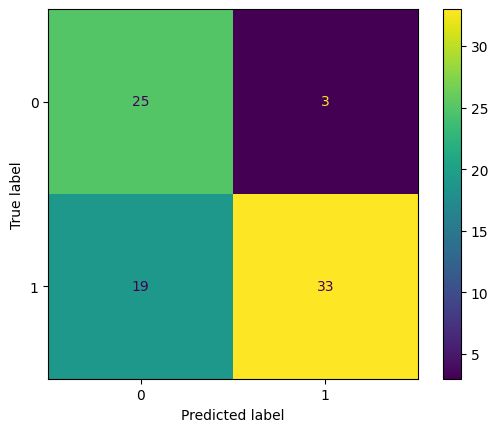

In [ ]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_knn.classes_)
disp.plot()
plt.show()

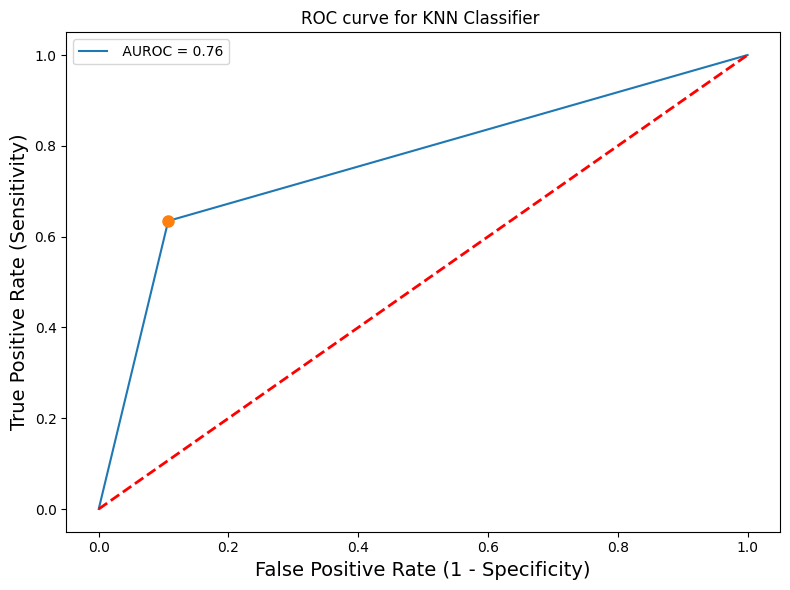

In [ ]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for KNN Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### XG_Boost

In [ ]:
Y_pred = clf_xgb.predict(X_test)

xgb_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [ ]:

mean_absolute_error(Y_test,Y_pred)

0.025

In [ ]:

# Calculate MSE
mse = mean_squared_error(Y_test, Y_pred)

# Calculate RMSE if needed
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.025
Root Mean Squared Error (RMSE): 0.15811388300841897


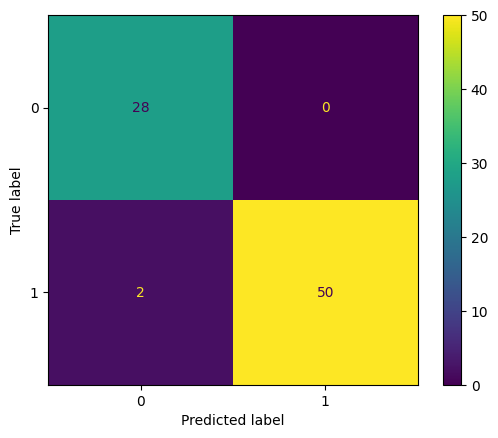

In [ ]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_xgb.classes_)
disp.plot()
plt.show()

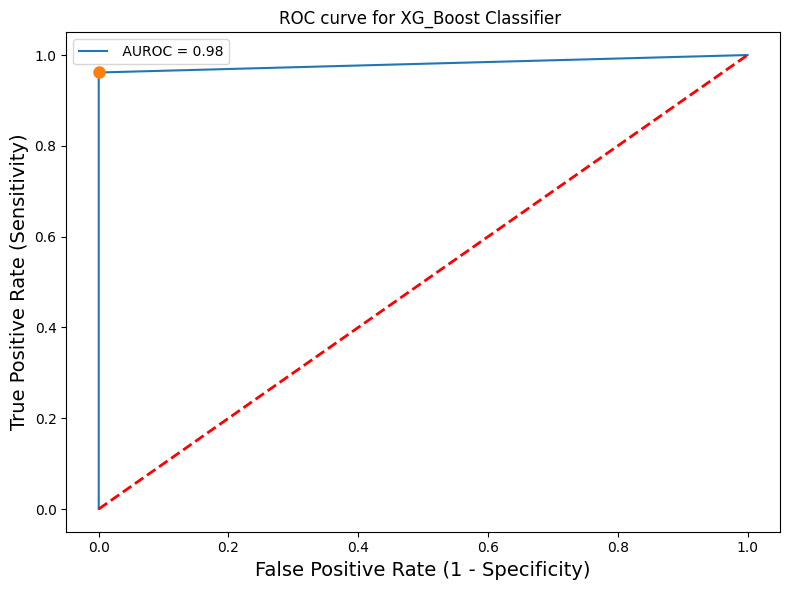

In [ ]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XG_Boost Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Decision Tree

In [ ]:
Y_pred = clf_dtc.predict(X_test)

dtc_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [ ]:
mean_absolute_error(Y_test,Y_pred)

0.0375

In [ ]:
# Calculate MSE
mse = mean_squared_error(Y_test, Y_pred)

# Calculate RMSE if needed
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0375
Root Mean Squared Error (RMSE): 0.19364916731037085


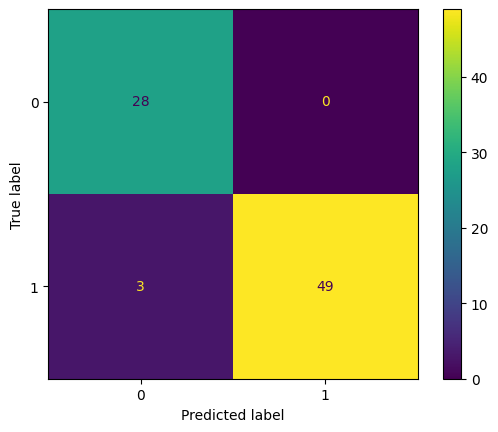

In [ ]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_dtc.classes_)
disp.plot()
plt.show()

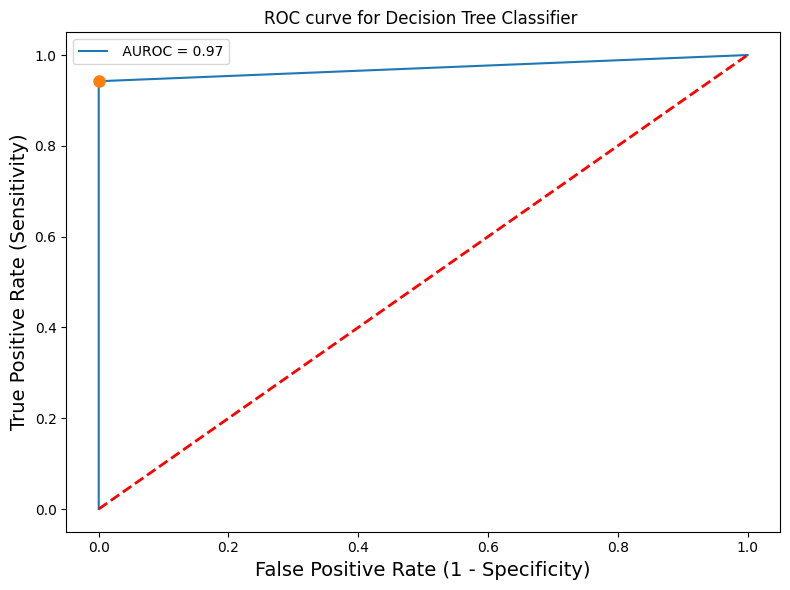

In [ ]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Decision Tree Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Ada Boost

In [ ]:
Y_pred = clf_ada.predict(X_test)

ada_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [ ]:

mean_absolute_error(Y_test,Y_pred)

0.025

In [ ]:
# Calculate MSE
mse = mean_squared_error(Y_test, Y_pred)

# Calculate RMSE if needed
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.025
Root Mean Squared Error (RMSE): 0.15811388300841897


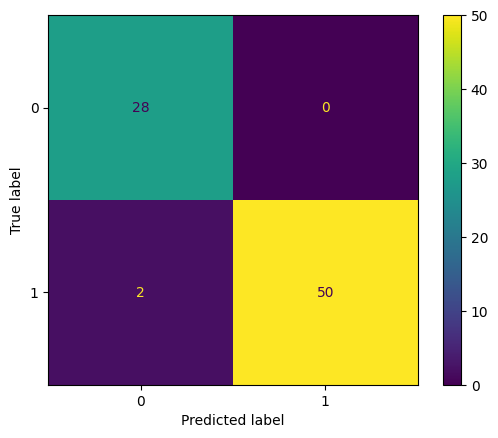

In [ ]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_ada.classes_)
disp.plot()
plt.show()

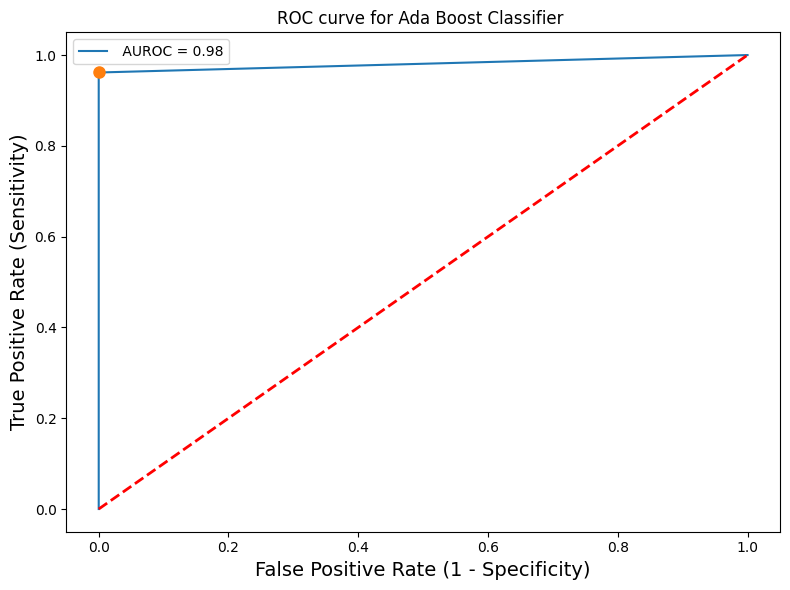

In [ ]:
fig, (ax2) = plt.subplots(figsize = (8,6))
#roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Ada Boost Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [ ]:
import plotly.express as px

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'Naive Bayes Classifier','KNN Classifier',
             'XG_Boost Classifier', 'Decision Tree Classifier', 'Ada_Boost Classifier'],
    'Score' : [rand_forest_acc, svm_acc, gnb_acc, knn_acc, xgb_acc, dtc_acc, ada_acc]
})


sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model',
       title = 'Models Comparison')

fig.show()

In [ ]:
import joblib  # If you haven't already imported this

# Assuming clf_rand_forest is your trained model
joblib.dump(clf_rand_forest, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
# Load your saved model
clf_rand_forest = joblib.load('random_forest_model.pkl')

In [ ]:

input_data = {
     'age': 45,
     'blood_pressure': 80,
    'specific_gravity': 1.02,
     'albumin': 0.5,
     'sugar': 0,
     'red_blood_cells': 1,
     'pus_cell': 0,
     'pus_cell_clumps': 0,
     'bacteria': 0,
     'blood_glucose_random': 100,
     'blood_urea': 30,
     'serum_creatinine': 1.0,
     'sodium': 135,
     'potassium': 4.5,
     'haemoglobin': 14,
     'packed_cell_volume': 45,
     'white_blood_cell_count': 7000,
     'red_blood_cell_count': 5.0,
     'hypertension': 0,  # 1 for Yes, 0 for No
     'diabetes_mellitus': 0,  # 1 for Yes, 0 for No
     'coronary_artery_disease': 0,  # 1 for Yes, 0 for No
     'appetite': 1,  # 1 for Good, 0 for Poor
     'peda_edema': 0,  # Corrected feature name
     'aanemia': 0  # Corrected feature name
}


In [ ]:
# input_data = {
#     'age': 65,  # Older age increases risk
#     'blood_pressure': 140,  # High blood pressure
#     'specific_gravity': 1.01,  # Indicates possible dilution of urine
#     'albumin': 2.5,  # High albumin level indicating possible kidney damage
#     'sugar': 1,  # Presence of sugar in urine can indicate diabetes or kidney issues
#     'red_blood_cells': 1,  # Presence of red blood cells (hematuria)
#     'pus_cell': 1,  # Presence of pus cells indicating infection or inflammation
#     'pus_cell_clumps': 1,  # Clumping could indicate infection
#     'bacteria': 1,  # Presence of bacteria indicates a urinary tract infection
#     'blood_glucose_random': 200,  # High blood glucose level indicates possible diabetes
#     'blood_urea': 50,  # Elevated blood urea nitrogen level indicating poor kidney function
#     'serum_creatinine': 2.5,  # High serum creatinine indicating impaired kidney function
#     'sodium': 130,  # Low sodium level may indicate kidney issues
#     'potassium': 5.5,  # High potassium level can be a sign of kidney problems
#     'haemoglobin': 10,  # Low hemoglobin level indicates anemia, common in CKD patients
#     'packed_cell_volume': 30,  # Low packed cell volume also suggests anemia
#     'white_blood_cell_count': 8000,  # Normal range, but could indicate infection
#     'red_blood_cell_count': 4.0,  # Low count might indicate anemia
#     'hypertension': 1,  # Yes, the patient has high blood pressure
#     'diabetes_mellitus': 1,  # Yes, the patient has diabetes
#     'coronary_artery_disease': 0,  # No coronary artery disease
#     'appetite': 0,  # Poor appetite is common in CKD
#     'peda_edema': 1,  # Yes, the patient has pedal edema (swelling)
#     'aanemia': 1  # Yes, the patient has anemia
# }


In [ ]:
def predictCKD(input_data):
    # Process the input_data dictionary
    age = input_data['age']
    blood_pressure = input_data['blood_pressure']
    specific_gravity = input_data['specific_gravity']
    albumin = input_data['albumin']
    sugar = input_data['sugar']
    red_blood_cells = input_data['red_blood_cells']
    pus_cell = input_data['pus_cell']
    pus_cell_clumps = input_data['pus_cell_clumps']
    bacteria = input_data['bacteria']
    blood_glucose_random = input_data['blood_glucose_random']
    blood_urea = input_data['blood_urea']
    serum_creatinine = input_data['serum_creatinine']
    sodium = input_data['sodium']
    potassium = input_data['potassium']
    haemoglobin = input_data['haemoglobin']
    packed_cell_volume = input_data['packed_cell_volume']
    white_blood_cell_count = input_data['white_blood_cell_count']
    red_blood_cell_count = input_data['red_blood_cell_count']
    hypertension = input_data['hypertension']
    diabetes_mellitus = input_data['diabetes_mellitus']
    coronary_artery_disease = input_data['coronary_artery_disease']
    appetite = input_data['appetite']
    peda_edema = input_data['peda_edema']
    anemia = input_data['anemia']

    # Your model prediction logic here
    prediction = model.predict([[age, blood_pressure, specific_gravity, albumin, sugar, red_blood_cells, pus_cell, pus_cell_clumps, bacteria, blood_glucose_random, blood_urea, serum_creatinine, sodium, potassium, haemoglobin, packed_cell_volume, white_blood_cell_count, red_blood_cell_count, hypertension, diabetes_mellitus, coronary_artery_disease, appetite, peda_edema, anemia]])

    return prediction


In [ ]:
# Convert the input data to a DataFrame
input_df = pd.DataFrame([input_data])

In [ ]:
input_df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,45,80,1.02,0.5,0,1,0,0,0,100,...,14,45,7000,5.0,0,0,0,1,0,0


In [ ]:
# Make predictions
predictions = clf_rand_forest.predict(input_df)

In [ ]:
# Display the result
print("Predicted class:", predictions[0])

Predicted class: 0


In [ ]:
probabilities = clf_rand_forest.predict_proba(input_df)
print("Probability of class 1 (CKD):", probabilities[0][1])
print("Probability of class 0 (No CKD):", probabilities[0][0])



Probability of class 1 (CKD): 0.3
Probability of class 0 (No CKD): 0.7


In [ ]:
!pip install fastapi uvicorn pyngrok joblib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00


In [ ]:
# from fastapi import FastAPI, HTTPException
# from pydantic import BaseModel
# import numpy as np


#Create a FastAPI Backend

In [ ]:

# # Define the FastAPI app
# app = FastAPI()

# # Define the input schema using Pydantic
# class PatientData(BaseModel):
#     age: int
#     blood_pressure: float
#     specific_gravity: float
#     albumin: int
#     sugar: int
#     red_blood_cells: str
#     pus_cell: str
#     pus_cell_clumps: str
#     bacteria: str
#     blood_glucose_random: float
#     blood_urea: float
#     serum_creatinine: float
#     sodium: float
#     potassium: float
#     haemoglobin: float
#     packed_cell_volume: int
#     white_blood_cell_count: int
#     red_blood_cell_count: float
#     hypertension: str
#     diabetes_mellitus: str
#     coronary_artery_disease: str
#     appetite: str
#     pedal_edema: str
#     anemia: str

# # Endpoint to receive patient data and return CKD prediction
# @app.post("/predict")
# async def predict_ckd(data: PatientData):
#     # Convert input data into a numpy array for the model
#     input_data = np.array([[
#         data.age,
#         data.blood_pressure,
#         data.specific_gravity,
#         data.albumin,
#         data.sugar,
#         1 if data.red_blood_cells == 'normal' else 0,
#         1 if data.pus_cell == 'normal' else 0,
#         1 if data.pus_cell_clumps == 'present' else 0,
#         1 if data.bacteria == 'present' else 0,
#         data.blood_glucose_random,
#         data.blood_urea,
#         data.serum_creatinine,
#         data.sodium,
#         data.potassium,
#         data.haemoglobin,
#         data.packed_cell_volume,
#         data.white_blood_cell_count,
#         data.red_blood_cell_count,
#         1 if data.hypertension == 'yes' else 0,
#         1 if data.diabetes_mellitus == 'yes' else 0,
#         1 if data.coronary_artery_disease == 'yes' else 0,
#         1 if data.appetite == 'good' else 0,
#         1 if data.pedal_edema == 'yes' else 0,
#         1 if data.anemia == 'yes' else 0
#     ]]).reshape(1, -1)

#     # Make a prediction using the model
#     prediction = clf_rand_forest.predict(input_data)
#     result = "Affected" if prediction[0] == 1 else "Not Affected"

#     return {"prediction": result}


#PREDICTION FUNCTION

In [ ]:
import numpy as np

def predict_ckd(age, bp, sg, al, su, rbc, pc, pcc, ba):
    # Preprocess input data
    rbc = 1 if rbc == "normal" else 0
    pc = 1 if pc == "normal" else 0
    pcc = 1 if pcc == "present" else 0
    ba = 1 if ba == "present" else 0

    input_data = np.array([[age, bp, sg, al, su, rbc, pc, pcc, ba]])
    prediction = random_forest_model.predict(input_data)

    return "Affected" if prediction[0] == 1 else "Not Affected"

def get_precautions(prediction):
    if prediction == "Affected":
        return "Precautions: Maintain a low-sodium diet, control blood pressure, monitor fluid intake, and avoid NSAIDs."
    else:
        return "Precautions: Maintain a healthy lifestyle to avoid future risks."


In [ ]:
from IPython.display import display, HTML, Javascript

In [ ]:
html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>CKD Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            max-width: 500px;
            margin: auto;
            padding: 20px;
            background-color: #f4f4f9;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        }
        input, select {
            width: 100%;
            padding: 10px;
            margin: 10px 0;
            border: 1px solid #ccc;
            border-radius: 5px;
        }
        button {
            background-color: #4CAF50;
            color: white;
            border: none;
            padding: 15px;
            width: 100%;
            border-radius: 5px;
            cursor: pointer;
        }
        button:hover {
            background-color: #45a049;
        }
        #result {
            margin-top: 20px;
            padding: 10px;
            background-color: #d1e7dd;
            border-left: 5px solid #0f5132;
            display: none;
        }
    </style>
</head>
<body>
    <h2>Chronic Kidney Disease Prediction</h2>


    <!-- Additional fields for CKD prediction -->

    <label>Age:</label>
    <input type="number" id="age" min="0" max="120">

    <label>Blood Pressure:</label>
    <input type="number" id="bp" min="0">

    <label>Specific Gravity:</label>
    <select id="sg">
        <option value="1.005">1.005</option>
        <option value="1.010">1.010</option>
        <option value="1.015">1.015</option>
        <option value="1.020">1.020</option>
        <option value="1.025">1.025</option>
    </select>

    <label>Albumin:</label>
    <input type="number" id="al" min="0" max="5">

    <label>Sugar:</label>
    <input type="number" id="su" min="0" max="5">

    <label>Red Blood Cells:</label>
    <select id="rbc">
        <option value="normal">Normal</option>
        <option value="abnormal">Abnormal</option>
    </select>

    <label>Pus Cell:</label>
    <select id="pc">
        <option value="normal">Normal</option>
        <option value="abnormal">Abnormal</option>
    </select>

    <label>Pus Cell Clumps:</label>
    <select id="pcc">
        <option value="notpresent">Not Present</option>
        <option value="present">Present</option>
    </select>

    <label>Bacteria:</label>
    <select id="ba">
        <option value="notpresent">Not Present</option>
        <option value="present">Present</option>
    </select>
    <label>Blood Glucose Random:</label>
    <input type="number" id="bgr" min="0">

    <label>Blood Urea:</label>
    <input type="number" id="bu" min="0">

    <label>Serum Creatinine:</label>
    <input type="number" id="sc" min="0">

    <label>Sodium:</label>
    <input type="number" id="sod" min="0">

    <label>Potassium:</label>
    <input type="number" id="pot" min="0">

    <label>Hemoglobin:</label>
    <input type="number" id="hemo" min="0">

    <label>Packed Cell Volume:</label>
    <input type="number" id="pcv" min="0">

    <label>White Blood Cell Count:</label>
    <input type="number" id="wbcc" min="0">

    <label>Red Blood Cell Count:</label>
    <input type="number" id="rbcc" min="0">

    <label>Hypertension:</label>
    <select id="htn">
        <option value="0">No</option>
        <option value="1">Yes</option>
    </select>

    <label>Diabetes Mellitus:</label>
    <select id="dm">
        <option value="0">No</option>
        <option value="1">Yes</option>
    </select>

    <label>Coronary Artery Disease:</label>
    <select id="cad">
        <option value="0">No</option>
        <option value="1">Yes</option>
    </select>

    <label>Appetite:</label>
    <select id="appet">
        <option value="0">Poor</option>
        <option value="1">Good</option>
    </select>

    <label>Pedal Edema:</label>
    <select id="pe">
        <option value="0">No</option>
        <option value="1">Yes</option>
    </select>

    <label>Anemia:</label>
    <select id="ane">
        <option value="0">No</option>
        <option value="1">Yes</option>
    </select>

    <button onclick="makePrediction()">Predict</button>

    <div id="result"></div>

    <script>
       async function makePrediction() {
    const input_data = {
        age: parseInt(document.getElementById('age').value),
        blood_pressure: (document.getElementById('bp').value),
        specific_gravity: (document.getElementById('sg').value),
        albumin: (document.getElementById('al').value),
        sugar: (document.getElementById('su').value),
        red_blood_cells: document.getElementById('rbc').value === "normal" ? 0 : 1,
        pus_cell: document.getElementById('pc').value === "normal" ? 0 : 1,
        pus_cell_clumps: document.getElementById('pcc').value === "notpresent" ? 0 : 1,
        bacteria: document.getElementById('ba').value === "notpresent" ? 0 : 1,
        blood_glucose_random: parseFloat(document.getElementById('bgr').value),
        blood_urea: parseFloat(document.getElementById('bu').value),
        serum_creatinine: parseFloat(document.getElementById('sc').value),
        sodium: parseFloat(document.getElementById('sod').value),
        potassium: parseFloat(document.getElementById('pot').value),
        haemoglobin: parseFloat(document.getElementById('hemo').value),
        packed_cell_volume: parseFloat(document.getElementById('pcv').value),
        white_blood_cell_count: parseFloat(document.getElementById('wbcc').value),
        red_blood_cell_count: parseFloat(document.getElementById('rbcc').value),
        hypertension: document.getElementById('htn').value === "1" ? 1 : 0,
        diabetes_mellitus: document.getElementById('dm').value === "1" ? 1 : 0,
        coronary_artery_disease: document.getElementById('cad').value === "1" ? 1 : 0,
        appetite: document.getElementById('appet').value === "1" ? 1 : 0,
        peda_edema: document.getElementById('pe').value === "1" ? 1 : 0,
        anemia: document.getElementById('ane').value === "1" ? 1 : 0
    };

    try {
        // Call the Python backend function
        const response = await google.colab.kernel.invokeFunction(
            'predictCKD', [input_data], {}
        );

        const result = response.data['text/plain'];
        console.log("Prediction Response:", result);

        const resultDiv = document.getElementById('result');
        resultDiv.style.display = 'block';
        resultDiv.innerHTML = `<strong>Prediction:</strong> ${result}`;
    } catch (error) {
        console.error("Error:", error);
        alert("Failed to get prediction. Check the console for details.");
    }
}

    </script>
</body>
</html>
"""
display(HTML(html_code))

In [ ]:
from google.colab import output


In [ ]:
# Load the model once at the start
random_forest_model = joblib.load('random_forest_model.pkl')

In [ ]:
from google.colab import output

# Define your CKD prediction function
def predictCKD(age, bp, sg, al, su, rbc, pc, pcc, ba):
    try:
        # Perform prediction
        prediction = predict_ckd(age, bp, sg, al, su, rbc, pc, pcc, ba)
        precautions = get_precautions(prediction)

        # Return the result
        return f"Prediction: {prediction}. {precautions}"
    except Exception as e:
        # Log any errors that occur
        print(f"Error: {e}")
        return "Error in prediction"

# Register the callback function
output.register_callback('predictCKD', predictCKD)
print("Callback registered successfully!")


Callback registered successfully!
